# 4、调用alpha101、alpha191、技术因子、candleresearch或者自己创造衍生因子，要求：任意两个因子，进行画图观察，主要例子看alpha101research和candleresearch，写研究报告（画了什么因子，思考了什么现象，对现象进行描述）


https://github.com/ChannelCMT/formula/wiki

数据类型和周期自定

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from jaqs_fxdayu.data.dataservice import LocalDataService
from time import time

ds = LocalDataService()

## 加freq参数
start = time()
path = r'./min_data/OANDA_M1'
props = {'fields': 'open,high,low,close,volume',\
         'symbol': 'AUD_USD:oanda,EUR_USD:oanda,GBP_USD:oanda,HK33_HKD:oanda,NAS100_USD:oanda,\
                    NZD_USD:oanda,USD_CAD:oanda,USD_CHF:oanda,USD_CNH:oanda,USD_JPY:oanda,WTICO_USD:oanda,XAU_USD:oanda',\
         'freq': '1H,15Min',\
         'start_date':20180601000000}

Time_dict = ds.bar_reader(path,props)
print(time()-start)

38.72554612159729


In [3]:
#调用模块
from jaqs_fxdayu.data.hf_dataview import HFDataView
dv1H = HFDataView()
dv15Min = HFDataView()

### 选择1H，15min 的oanda数据，起始日期为20180601

In [4]:
dv15Min.create_init_dv(Time_dict['15Min'].dropna().set_index(["trade_date","symbol"]))
dv1H.create_init_dv(Time_dict['1H'].dropna().set_index(["trade_date","symbol"]))

Initialize dataview success.
Initialize dataview success.


In [5]:
import matplotlib.pyplot as plt

def plot_chart(close,alpha):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,8))
    ax.plot(close.iloc[-250:])  #只取后250个数据点观察
    ax1.plot(alpha.iloc[-250:])
    # plt.savefig('good')
    plt.show()

In [6]:
def RankPct(df):
    return df.rank(axis=1, pct=True)

### 构造收益率序列，然后画图观察

In [7]:
ROR15 = dv15Min.add_formula('ReturnRate', 'Return(close,1)',add_data=True)  # 相比于上一次的收益率

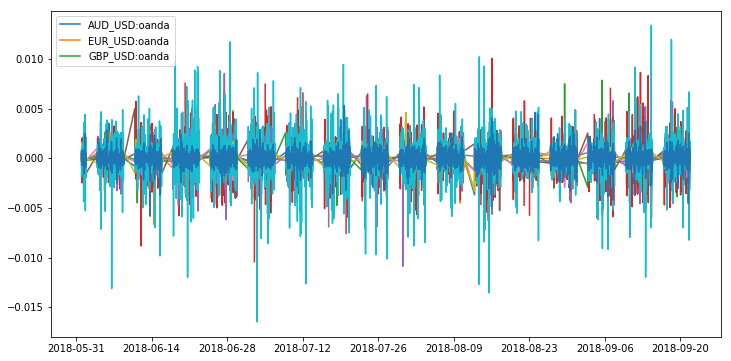

In [8]:
#观察收益率波动情况
import matplotlib.pyplot as plt
label = ['AUD_USD:oanda','EUR_USD:oanda','GBP_USD:oanda']  
plt.figure(figsize=(12,6))# 分别代表宽和高
plt.plot(dv15Min.get_ts('ReturnRate', date_type='datetime'))
plt.legend(label,loc = 0)  
plt.show()

## 前期测试alpha4和alpha10还可以

In [9]:
alpha4_change=dv15Min.add_formula('alpha4_C','Ts_Rank(low,9)',add_data=True,register_funcs={'RankPct':RankPct})

In [10]:
alpha10 = dv15Min.add_formula('alpha10_C','If(Ts_Min(Delta(close,1),4)>0,Delta(close,1),If((Ts_Max(Delta(close,1),4)<0),Delta(close,1),(-1*Delta(close,1))))',add_data=True)

### 画图观察数据Alpha4,Alpha10

-------------------------------------------------------Alpha4-----------------------------------------------------------


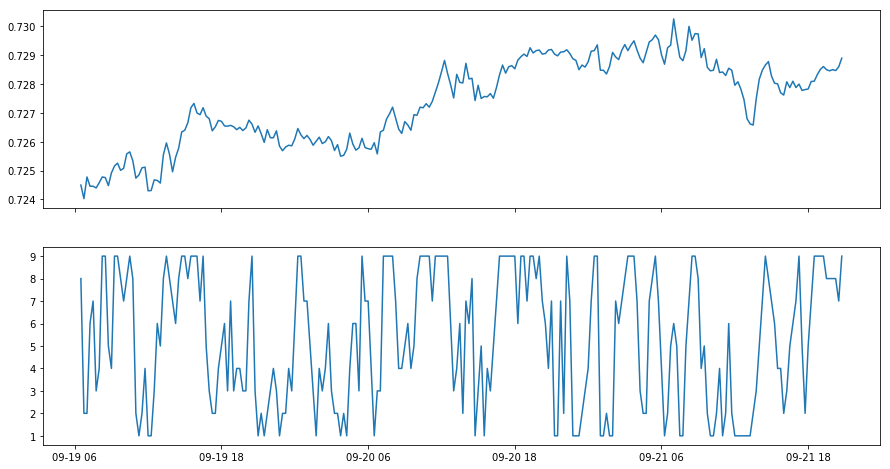

-------------------------------------------------------Alpha10-----------------------------------------------------------


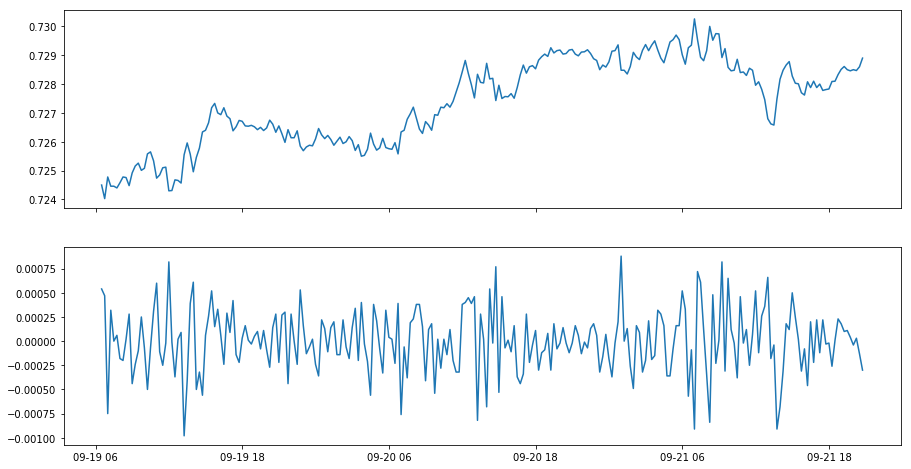

In [11]:
close = dv15Min.get_ts('close', date_type='datetime')['AUD_USD:oanda']
ROReturn = dv15Min.get_ts('ReturnRate', date_type='datetime')['AUD_USD:oanda']
alpha4_plot = dv15Min.get_ts('alpha4_C',date_type='datetime')['AUD_USD:oanda']
print("-------------------------------------------------------"+str('Alpha4')+"-----------------------------------------------------------")
plot_chart(close, alpha4_plot)

alpha10_plot = dv15Min.get_ts('alpha10_C',date_type='datetime')['AUD_USD:oanda']
print("-------------------------------------------------------"+str('Alpha10')+"-----------------------------------------------------------")
plot_chart(close, alpha10_plot)

### 使用alphalens计算因子绩效

In [12]:
import alphalens

#### 首先是alpha4的绩效

In [13]:
prices = dv15Min.get_ts('close', date_type='datetime') #获取价格(收盘价)
factor = dv15Min.get_ts('alpha4_C',date_type='datetime')
# factor = factor.stack()#处理成MultiIndex格式（alphalens分析因子必须的格式）
print(prices.iloc[:,0].size)#行数 
print(factor.iloc[:,0].size)#行数 
factor.head()

7764
7764


symbol,AUD_USD:oanda,EUR_USD:oanda,GBP_USD:oanda,HK33_HKD:oanda,NAS100_USD:oanda,USD_CAD:oanda,USD_CHF:oanda,USD_CNH:oanda,USD_JPY:oanda,WTICO_USD:oanda,XAU_USD:oanda
trade_date,,,,,,,,,,,
2018-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-01 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
factor = factor.stack()#处理成MultiIndex格式（alphalens分析因子必须的格式）

In [15]:
prices.head()

symbol,AUD_USD:oanda,EUR_USD:oanda,GBP_USD:oanda,HK33_HKD:oanda,NAS100_USD:oanda,USD_CAD:oanda,USD_CHF:oanda,USD_CNH:oanda,USD_JPY:oanda,WTICO_USD:oanda,XAU_USD:oanda
trade_date,,,,,,,,,,,
2018-06-01 00:00:00,0.75594,1.16872,1.32844,NaN,6982.7,1.29454,0.98541,6.40557,108.836,67.031,1298.884
2018-06-01 00:15:00,0.75611,1.16870,1.32852,NaN,6980.3,1.29447,0.98543,6.40480,108.800,66.911,1298.684
2018-06-01 00:30:00,0.75654,1.16913,1.32886,NaN,6981.3,1.29420,0.98538,6.40413,108.880,66.869,1298.520
2018-06-01 00:45:00,0.75656,1.16938,1.32904,NaN,6984.4,1.29391,0.98530,6.40362,108.865,66.921,1299.508
2018-06-01 01:00:00,0.75689,1.16956,1.32900,NaN,6988.3,1.29382,0.98532,6.40668,108.936,66.991,1299.767


In [18]:
#计算目标股票池每只股票的持有期收益，和对应因子值的quantile分类
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor, prices, quantiles=5, periods=(5,10,20),max_loss=1)
factor_data.head(11)

Dropped 63.4% entries from factor data (6.8% after in forward returns computation and 56.6% in binning phase). Set max_loss=0 to see potentially suppressed Exceptions.


5        10        20  factor  \
date                asset                                                    
2018-06-01 04:00:00 AUD_USD:oanda    -0.000530 -0.000252 -0.000689     2.0   
                    EUR_USD:oanda    -0.000557  0.000000  0.000274     2.0   
                    GBP_USD:oanda     0.000211  0.001387  0.002413     4.0   
                    NAS100_USD:oanda  0.000573  0.001189  0.002119     1.0   
                    USD_CAD:oanda     0.000093 -0.001142 -0.000787     7.0   
                    USD_CHF:oanda    -0.000121  0.000537 -0.001620     9.0   
                    USD_CNH:oanda     0.000193 -0.000271 -0.000064     7.0   
                    USD_JPY:oanda    -0.000376  0.000797  0.000486     5.0   
                    WTICO_USD:oanda  -0.000150  0.002543  0.006133     5.0   
                    XAU_USD:oanda    -0.000051 -0.000132  0.000676     8.0   
2018-06-01 04:15:00 AUD_USD:oanda    -0.000398  0.000225 -0.000490     2.0   

                                      factor_quantile  
date                asset                              
2018-06-01 04:00:00 AUD_USD:oanda                 1.0  
                    EUR_USD:oanda                 1.0  
                    GBP_USD:oanda                 2.0  
                    NAS100_USD:oanda              1.0  
                    USD_CAD:oanda                 4.0  
                    USD_CHF:oanda                 5.0  
                    USD_CNH:oanda                 4.0  
                    USD_JPY:oanda                 3.0  
                    WTICO_USD:oanda               3.0  
                    XAU_USD:oanda                 5.0  
2018-06-01 04:15:00 AUD_USD:oanda                 1.0

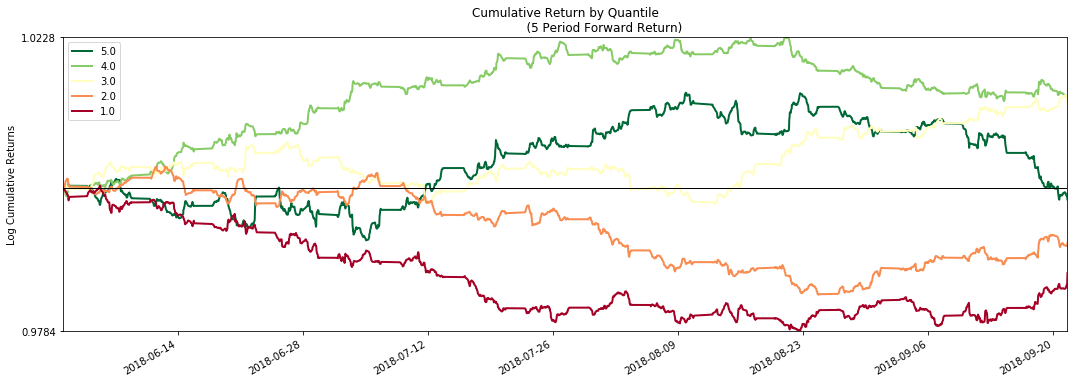

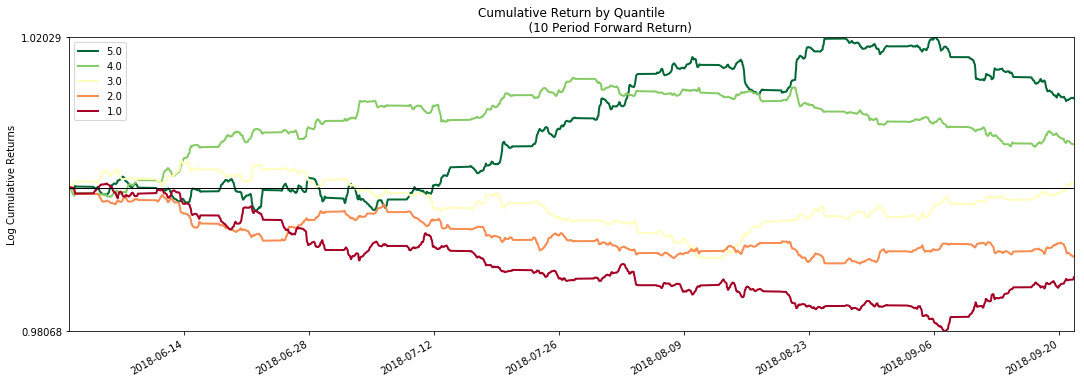

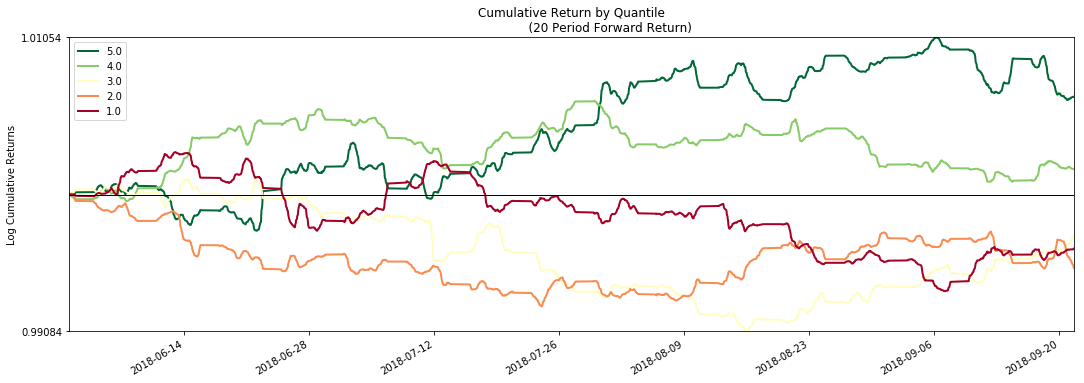

In [19]:
import matplotlib.pyplot as plt
mean_return_by_q, std_err_by_q = alphalens.performance.mean_return_by_quantile(factor_data, by_date=True, demeaned=True)

alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q, 5)
alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q, 10)
alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q, 20)
plt.show()

#### 然后是alpha10的绩效

In [20]:
prices = dv15Min.get_ts('close', date_type='datetime') #获取价格(收盘价)
factor = dv15Min.get_ts('alpha10_C',date_type='datetime')
factor = factor.stack()#处理成MultiIndex格式（alphalens分析因子必须的格式）

In [21]:
#计算目标股票池每只股票的持有期收益，和对应因子值的quantile分类
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor, prices, quantiles=5, periods=(5,10,20),max_loss=1)
factor_data.head(11)

Dropped 7.3% entries from factor data (7.2% after in forward returns computation and 0.0% in binning phase). Set max_loss=0 to see potentially suppressed Exceptions.


5        10        20   factor  \
date                asset                                                     
2018-06-01 01:00:00 AUD_USD:oanda    -0.000317 -0.002603 -0.003977  0.00033   
                    EUR_USD:oanda    -0.000086 -0.001231 -0.002155 -0.00018   
                    GBP_USD:oanda    -0.000587 -0.002190 -0.001558  0.00004   
                    NAS100_USD:oanda  0.000358 -0.000157  0.000072 -3.90000   
                    USD_CAD:oanda     0.000742  0.001569  0.001360 -0.00009   
                    USD_CHF:oanda     0.001015  0.002355  0.003065 -0.00002   
                    USD_CNH:oanda     0.000745  0.001040  0.001211 -0.00306   
                    USD_JPY:oanda     0.001239  0.002368  0.001863 -0.07100   
                    WTICO_USD:oanda  -0.001075 -0.002373 -0.001030 -0.07000   
                    XAU_USD:oanda    -0.000622 -0.000990 -0.001032 -0.25900   
2018-06-01 01:15:00 AUD_USD:oanda     0.000423 -0.001375 -0.002116  0.00079   

                                      factor_quantile  
date                asset                              
2018-06-01 01:00:00 AUD_USD:oanda                 5.0  
                    EUR_USD:oanda                 3.0  
                    GBP_USD:oanda                 5.0  
                    NAS100_USD:oanda              1.0  
                    USD_CAD:oanda                 4.0  
                    USD_CHF:oanda                 4.0  
                    USD_CNH:oanda                 3.0  
                    USD_JPY:oanda                 2.0  
                    WTICO_USD:oanda               2.0  
                    XAU_USD:oanda                 1.0  
2018-06-01 01:15:00 AUD_USD:oanda                 4.0

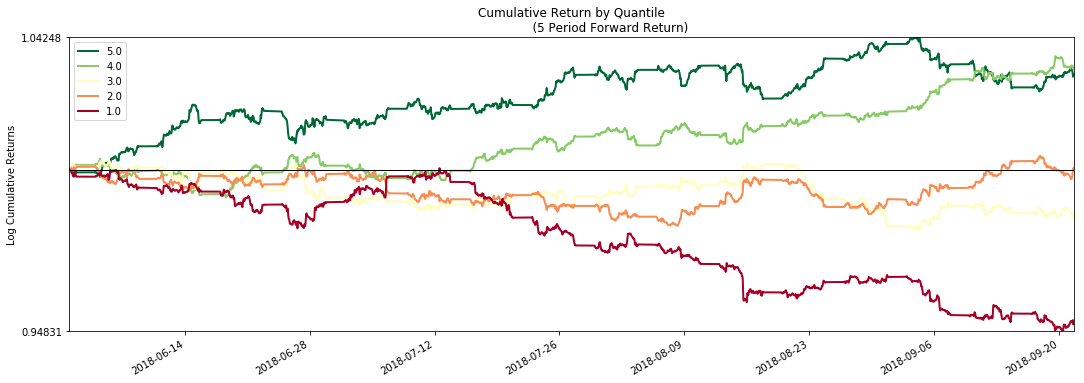

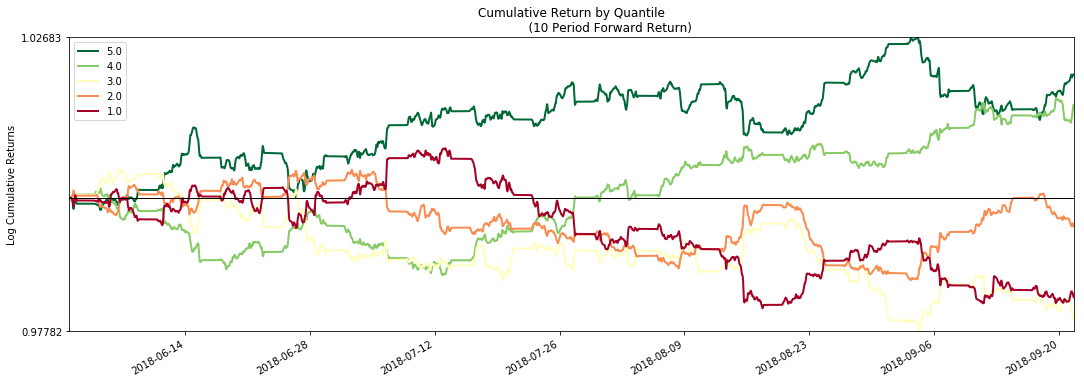

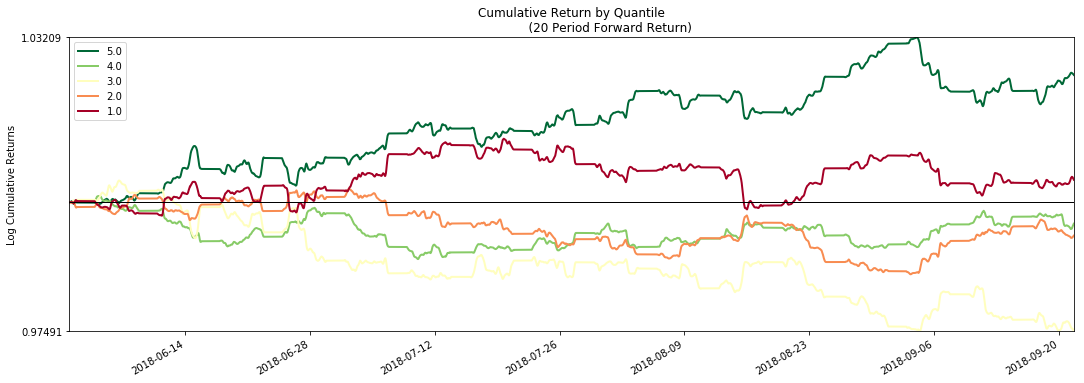

In [22]:
import matplotlib.pyplot as plt
mean_return_by_q, std_err_by_q = alphalens.performance.mean_return_by_quantile(factor_data, by_date=True, demeaned=True)

alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q, 5)
alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q, 10)
alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q, 20)
plt.show()

## 研究报告总结

### **本次研究的因子是alpha4和alpha10**

标的物为：AUD_USD:oanda,EUR_USD:oanda,GBP_USD:oanda,HK33_HKD:oanda,NAS100_USD:oanda,
                    NZD_USD:oanda,USD_CAD:oanda,USD_CHF:oanda,USD_CNH:oanda,USD_JPY:oanda,WTICO_USD:oanda,XAU_USD:oanda
                    
选择15min 的数据，起始日期为201806010000





#### 1、首先画出了两个因子的收盘价与因子数值的变化趋势图

从改进后的alpha4的线性图中可以看出Alpha004是一个基于滚动9日最低价的跟随策略，当出现价格上涨趋势时，因子值都会变大

结合alpha10的公式和线形图，可以看出，alpha010是反转策略和趋势跟踪策略的结合：
* 当连续4日上涨或连续4日下跌时，因子值取今日上涨或下跌的程度值d4的升序Boolean值，alpha10为趋势跟踪策略；
* 其他时候，因子值取今日上涨或下跌的程度值d4的降序Boolean值，alpha10为反转策略。

#### 2、利用alphalens初步计算了因子的分组绩效

具体设置如下：

* 因子分组为5组，因子值大的组别号更大
* 设置持仓周期为5,10,20天，然后分别看分组的收益


如图所示：

对于alpha4，当持有的标的组合的持仓周期为10天时，因子分组最明显，最有效果

对于alpha10，当持有标的组合的持仓周期为5天时，因子分组最明显，最有效果。



# 5、观察两个因子，和价格图有什么联系，如果是蜡烛图，和成交量有什么联系，怎么找到相应的信号，提出自己信号进出场的假设。（分别完成两个因子的信号假设）

信号进出场假设：可以借鉴MastatiscResearch，但不要将思路假设局限在均线上，可以观察大盘上的其他现象来写信号假设，也可以进行同时满足多个因子的信号来设计信号假设等等。

此处需要说出联系、找到的信号、你的信号进出场假设是什么

鉴于两个Alpha因子都是趋势类的策略，这里打算利用通道突破的思想，对因子表现出来的趋势做一个判断，从而建立相应的仓位。打算尝试的通道有下面两个。

#### 1. 均线百分比通道

$Upper = MA*1.03$

$lower = MA*0.97$

---

#### 2. 布林带通道
$upper = MA+2\sigma$

$lower = MA-2\sigma$

---


####  3、进出场假设

Buy: 

$Signal_t > upperMA5  \text{ and }    Signal_t > upperMA20$

Exit: 

$Signal_t < lowerMA5   \text{ or }    Signal_t < lowerMA5$